# Control de cargas de la tabla de metereologia

In [1]:
!pip install pymysql

In [2]:
!pip install cryptography

In [3]:
!pip install matplotlib

In [4]:

import pandas as pd
import numpy as np
import pymysql
import cryptography
import pandas as pd
import matplotlib.pyplot as plt

Nos conectamos a la base de datos tal y como lo hacemos en los scripts de conectividad:

In [14]:

host = '35.241.159.127' #este el el host nuevo
user = 'admin'
password = '12345678'
database = 'GET_DATABASE'

Construimos el conector de la misma manera que se ha hecho otras veces

In [15]:
connection = pymysql.connect(host=host,
                             user=user,
                             password=password,
                             db=database)

cursor = connection.cursor()

cargamos la función que nos scrapeara los datos

In [16]:
def run_query(q):
    with pymysql.connect(host=host,
                             user=user,
                             password=password,
                             db=database) as conn:
        return pd.read_sql(q, conn)

    
'''
Como en la semana de 28/03 se ha trabajado con las funciones de Google Functions y se está cargando la huedad en una 
nueva tabla vamos a utilizar la clausula de q1 para extraer la información  tal y como se hace en PowerBi.

'''


q = 'select * from METEREOLOGIA where Temperatura_media < 900;'



sentencia = q


print(run_query(sentencia))

C:\Users\kaiet.iglesias_bluet\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


           fecha             Estacion Provincia  Temperatura_media  \
0     1998-01-01  ALBACETE BASE AÉREA  ALBACETE                  6   
1     1998-01-02  ALBACETE BASE AÉREA  ALBACETE                  6   
2     1998-01-03  ALBACETE BASE AÉREA  ALBACETE                 11   
3     1998-01-04  ALBACETE BASE AÉREA  ALBACETE                 11   
4     1998-01-05  ALBACETE BASE AÉREA  ALBACETE                  9   
...          ...                  ...       ...                ...   
9311  2022-03-25  ALBACETE BASE AÉREA  ALBACETE                 10   
9312  2022-03-26  ALBACETE BASE AÉREA  ALBACETE                  9   
9313  2022-03-26  ALBACETE BASE AÉREA  ALBACETE                  9   
9314  2022-03-27  ALBACETE BASE AÉREA  ALBACETE                 10   
9315  2022-03-28  ALBACETE BASE AÉREA  ALBACETE                  9   

      Precipitacion_l_m3  Temperatura_minima  Temperatura_maxima  \
0                      0                 2.4                 8.6   
1                      

Realizamos la gráfica

In [17]:
datos_humedad_historico = run_query(sentencia)

#vemos los resultados

print(datos_humedad_historico.head())

C:\Users\kaiet.iglesias_bluet\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


        fecha             Estacion Provincia  Temperatura_media  \
0  1998-01-01  ALBACETE BASE AÉREA  ALBACETE                  6   
1  1998-01-02  ALBACETE BASE AÉREA  ALBACETE                  6   
2  1998-01-03  ALBACETE BASE AÉREA  ALBACETE                 11   
3  1998-01-04  ALBACETE BASE AÉREA  ALBACETE                 11   
4  1998-01-05  ALBACETE BASE AÉREA  ALBACETE                  9   

   Precipitacion_l_m3  Temperatura_minima  Temperatura_maxima  \
0                   0                 2.4                 8.6   
1                   0                 2.0                 9.8   
2                   0                 7.2                15.2   
3                   0                 9.2                13.1   
4                   0                 3.0                15.0   

  Direccion_viento  Velocidad_media  Presion_maxima  Presion_minima  \
0              999            999.0           940.4           930.9   
1              999            999.0           941.8           93

In [9]:
try: 
    
    if sentencia == q: 

        humedad_media_dia =  pd.pivot_table(datos_humedad_historico, values='Temperatura_media' , index='fecha')

        #vemos el resultado

        #humedad_media_dia
    
    else: 

        humedad_media_dia = datos_humedad_historico.set_index('DIA')
        
except: 
    
    print('Algo falla')

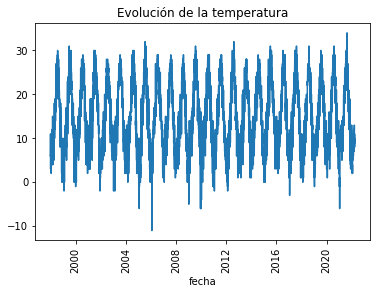

In [10]:


try: 
    
    humedad_media_dia['Temperatura_media'].plot()
    plt.title('Evolución de la temperatura')
    plt.xticks(rotation = 90)
    plt.show()

except:
    
    print('Algo falla')


In [11]:

datos_humedad_historico = run_query(sentencia)
datos_humedad_historico =  datos_humedad_historico[['fecha', 'Temperatura_media']]

print(datos_humedad_historico.head())

print('\n ###################### \n')

print(datos_humedad_historico.tail())

C:\Users\kaiet.iglesias_bluet\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


        fecha  Temperatura_media
0  1998-01-01                  6
1  1998-01-02                  6
2  1998-01-03                 11
3  1998-01-04                 11
4  1998-01-05                  9

 ###################### 

           fecha  Temperatura_media
9311  2022-03-25                 10
9312  2022-03-26                  9
9313  2022-03-26                  9
9314  2022-03-27                 10
9315  2022-03-28                  9


In [12]:
datos_humedad_historico[datos_humedad_historico['fecha'] == '2022-01-01' ]

,fecha,Temperatura_media
